In [1]:
## Earthquake Group (749-750h) code
# Import the necessary libraries
import h5py
import numpy as np
from scipy.signal import butter, filtfilt

In [2]:
# Explore the HDF5 file to extract the list of sites and their properties
def explore_h5_file(file_path):
    with h5py.File(file_path, 'r') as f:
        stations_list = list(f.keys())
        station_attrs = {}
        for station in stations_list:
            attrs = {
                'lat': f[station].attrs.get('lat', None),
                'lon': f[station].attrs.get('lon', None),
                'dist_m': f[station].attrs.get('dist_m', None)
            }
            station_attrs[station] = attrs
        return stations_list, station_attrs

In [3]:
# Find common stations in multiple files
def find_common_stations(file_paths):
    common_stations = None
    all_station_attrs = {}

    for file_path in file_paths:
        stations_list, station_attrs = explore_h5_file(file_path)
        all_station_attrs[file_path] = station_attrs

        stations_in_file = set(stations_list)

        if common_stations is None:
            common_stations = stations_in_file
        else:
            common_stations = common_stations.intersection(stations_in_file)

    return common_stations, all_station_attrs

In [4]:
# Extract data for a specified period of time
def extract_data_from_common_stations(common_stations, file_paths, x, y):
    data = {}
    num_channels = 1
    start = x * 3600 * 100
    end = y * 3600 * 100

    for file_path in file_paths:
        with h5py.File(file_path, 'r') as f:
            data[file_path] = {}
            for station in common_stations:
                station_data = f[station][:num_channels, start:end]
                data[file_path][station] = station_data
    
    return data

In [5]:
# Calculate a list of distances from the epicenter
def distance_epicenter(file_paths):
    distance_list = {}

    for file_path in file_paths:
        with h5py.File(file_path, 'r') as f:
            for station in f.keys():
                distance_list[station] = f[station].attrs['dist_m']
    
    return distance_list

In [6]:
# Set the file path
file_paths = [
    '/home3/pmzg56/DS Project/ev0000593283.h5',
    '/home3/pmzg56/DS Project/ev0002128689.h5'
]

# Find common stations
common_stations, station_attrs = find_common_stations(file_paths)
print("Common stations across all files:", common_stations)

Common stations across all files: {'SUKH', 'MSMH', 'KIGH', 'KWMH', 'MISH', 'YGNH', 'TYNH', 'MSIH', 'NRAH', 'IZMH', 'YMGH', 'NOBH', 'NTHH', 'KHKH', 'NCNH', 'SBAH', 'HYGH', 'BZNH', 'KIWH', 'UMWH', 'KKEH', 'SGWH', 'MRTH', 'OGNH', 'TGOH', 'UKHH', 'KKCH', 'MIEH', 'SDWH', 'TAKH', 'UWEH', 'SNIH', 'KTMH', 'HYOH', 'GKSH', 'SIKH', 'HKSH', 'MJNH', 'NMNH', 'AKIH', 'YABH', 'ASKH', 'NANH', 'UMEH', 'MJSH', 'TMNH'}


In [7]:
# Extract data from public sites, extract 749 to 750th hour data as earthquake group
data = extract_data_from_common_stations(common_stations, file_paths, 749, 750)
print("Extracted data:", data)

Extracted data: {'/home3/pmzg56/DS Project/ev0000593283.h5': {'SUKH': array([[42.50498   , 42.650707  , 42.793667  , ..., -0.06737059,
        -0.0671027 , -0.06683325]], dtype=float32), 'MSMH': array([[-7.5040765e+02, -7.4881213e+02, -7.4718768e+02, ...,
         1.0773130e-02,  1.2016450e-02,  1.3255223e-02]], dtype=float32), 'KIGH': array([[ 9.743653  ,  9.931456  , 10.118283  , ...,  0.03924707,
         0.03956017,  0.03987509]], dtype=float32), 'KWMH': array([[-1.00249733e+02, -1.01046997e+02, -1.01789314e+02, ...,
         3.03678703e-03,  3.05766612e-03,  3.08071449e-03]], dtype=float32), 'MISH': array([[-9.531127  , -9.480015  , -9.431103  , ..., -0.05082899,
        -0.0506978 , -0.05056452]], dtype=float32), 'YGNH': array([[-1.6395049e+02, -1.6363196e+02, -1.6331483e+02, ...,
         6.6594146e-03,  7.1149804e-03,  7.5712814e-03]], dtype=float32), 'TYNH': array([[-1.0086599e+03, -1.0243973e+03, -1.0401567e+03, ...,
         2.1193344e-03,  2.4503765e-03,  2.7668884e-03]], d

In [8]:
# Calculate the epicenter distance
distances = distance_epicenter(file_paths)
print("Distances from epicenter:", distances)

Distances from epicenter: {'AIRH': '0115413', 'AKIH': '0091381', 'AKNH': '0100364', 'ASKH': '0148127', 'BZNH': '0130749', 'CZEH': '0120871', 'FJIH': '0091547', 'GENH': '0125397', 'GKSH': '0079703', 'HKSH': '0091625', 'HRDH': '0138553', 'HSFH': '0078766', 'HYGH': '0059764', 'HYOH': '0137738', 'IMRH': '0104454', 'IZMH': '0112444', 'KAHH': '0089978', 'KDIH': '0101062', 'KHKH': '0136013', 'KIGH': '0036574', 'KIWH': '0142787', 'KKCH': '0120418', 'KKEH': '0102169', 'KKIH': '0097114', 'KKYH': '0127834', 'KORH': '0120239', 'KTMH': '0106536', 'KWMH': '0075532', 'KYAH': '0148781', 'MIEH': '0054376', 'MISH': '0072836', 'MJNH': '0142095', 'MJSH': '0143950', 'MMTH': '0075866', 'MRTH': '0072613', 'MSIH': '0117703', 'MSMH': '0142377', 'MYJH': '0091054', 'NANH': '0086038', 'NCNH': '0144669', 'NGSH': '0088820', 'NMNH': '0084029', 'NOBH': '0042335', 'NRAH': '0100514', 'NSMH': '0091820', 'NTHH': '0069293', 'OGNH': '0104598', 'OSUH': '0132034', 'SBAH': '0094716', 'SBNH': '0110621', 'SBSH': '0102628', 'SDW

In [9]:
# Function for selecting the site
def select_stations_by_distance(distances, num_near=3, num_mid=3, num_far=3):
    # Sort sites by distance
    sorted_stations = sorted(distances.items(), key=lambda item: item[1])
    
    # Select the near range stations
    near_stations = [station for station, _ in sorted_stations[:num_near]]
    
    # Select the medium range stations
    mid_stations = [station for station, _ in sorted_stations[num_near:num_near+num_mid]]
    
    # Select the far range stations
    far_stations = [station for station, _ in sorted_stations[-num_far:]]
    
    return near_stations, mid_stations, far_stations

# Use selection function
near_stations, mid_stations, far_stations = select_stations_by_distance(distances)
print("Near stations:", near_stations)
print("Mid-range stations:", mid_stations)
print("Far stations:", far_stations)

# Select stations and extract corresponding data
selected_stations = near_stations + mid_stations + far_stations

# Extract data and ignore non-existent stations
selected_data = {}

for file_path in data:
    for station in selected_stations:
        if station in data[file_path]:
            if station not in selected_data:
                selected_data[station] = []
            selected_data[station].append(data[file_path][station])

print("Selected data for processing:", selected_data)
print("Available stations in selected data:", list(selected_data.keys()))

Near stations: ['SIKH', 'KIGH', 'UMEH']
Mid-range stations: ['NOBH', 'UMWH', 'MIEH']
Far stations: ['UBEH', 'ASKH', 'KYAH']
Selected data for processing: {'SIKH': [array([[9.130666  , 9.221782  , 9.313624  , ..., 0.04654244, 0.04676283,
        0.04698114]], dtype=float32), array([[-1.8103432e+01, -2.0341063e+01, -2.2577168e+01, ...,
         1.2478534e-02,  1.2407879e-02,  1.2337068e-02]], dtype=float32)], 'KIGH': [array([[ 9.743653  ,  9.931456  , 10.118283  , ...,  0.03924707,
         0.03956017,  0.03987509]], dtype=float32), array([[-8.9063824e+02, -8.8822345e+02, -8.8579889e+02, ...,
        -2.5999906e-02, -2.5794722e-02, -2.5589541e-02]], dtype=float32)], 'UMEH': [array([[1.6377149 , 1.814925  , 2.0017145 , ..., 0.01244549, 0.01414863,
        0.01585222]], dtype=float32), array([[-62.802547 , -62.71459  , -62.626163 , ...,  -5.4020543,
         -5.36149  ,  -5.3209777]], dtype=float32)], 'NOBH': [array([[-5.5062622e+01, -5.5779644e+01, -5.6497978e+01, ...,
         4.4623539e

In [10]:
# Define high pass filtering function
def high_pass_filter(data, cutoff_freq=2, fs=100):
    b, a = butter(4, cutoff_freq / (0.5 * fs), btype='high')
    filtered_data = filtfilt(b, a, data, axis=1)
    return filtered_data

# Define signal truncation function
def data_cutoff(data, fs=100, window_size=5):
    num_samples = int(window_size * fs)
    num_windows = data.shape[1] // num_samples
    data_cut = [data[:, i * num_samples:(i + 1) * num_samples] for i in range(num_windows)]
    return np.array(data_cut)

In [11]:
# Process data for all stations
def process_data(selected_data):
    all_data = []

    for station in selected_data:
        for station_data in selected_data[station]:
            print(f"Processing station {station} with data shape {station_data.shape}")
            cut_data = data_cutoff(station_data)
            print(f"Data shape after slicing: {cut_data.shape}")
            filtered_station_data = np.array([high_pass_filter(chunk) for chunk in cut_data])
            all_data.append(filtered_station_data)
    
    all_data = np.vstack(all_data)
    
    return all_data

filtered_data = process_data(selected_data)
print("Combined data shape:", filtered_data.shape)

Processing station SIKH with data shape (1, 360000)
Data shape after slicing: (720, 1, 500)
Processing station SIKH with data shape (1, 360000)
Data shape after slicing: (720, 1, 500)
Processing station KIGH with data shape (1, 360000)
Data shape after slicing: (720, 1, 500)
Processing station KIGH with data shape (1, 360000)
Data shape after slicing: (720, 1, 500)
Processing station UMEH with data shape (1, 360000)
Data shape after slicing: (720, 1, 500)
Processing station UMEH with data shape (1, 23300)
Data shape after slicing: (46, 1, 500)
Processing station NOBH with data shape (1, 360000)
Data shape after slicing: (720, 1, 500)
Processing station NOBH with data shape (1, 360000)
Data shape after slicing: (720, 1, 500)
Processing station UMWH with data shape (1, 360000)
Data shape after slicing: (720, 1, 500)
Processing station UMWH with data shape (1, 360000)
Data shape after slicing: (720, 1, 500)
Processing station MIEH with data shape (1, 360000)
Data shape after slicing: (720

In [12]:
# Fourier Transform
def myfourier(x):
    fs = 100
    n = x.shape[2]
    fi = np.linspace(0, fs / 2, int(n / 2))
    datafft = []

    for i in range(len(x)):
        fft_values = np.abs(np.fft.fft(x[i, 0, :])[:int(n / 2)])
        datafft.append(fft_values)

    return np.array(datafft)

datafft = myfourier(filtered_data)

print("FFT result shape:", datafft.shape)

FFT result shape: (9406, 250)


In [13]:
import numpy as np
import pandas as pd

# 1.Calculate the characteristics of the integral square waveform
def iosw(x):
    integral = []
    for i in range(len(x)):
        data0 = x[i]
        data_squared = data0 ** 2
        integral.append(np.sum(data_squared))
    return integral

integral = iosw(datafft)

print("Integral of the Squared Waveform (First 10):")
print(integral[:10])

Integral of the Squared Waveform (First 10):
[100.326480022919, 139.4018375671817, 246.18946240145405, 575.1674737995564, 87.48335629040325, 154.08615710465043, 8401.834414810899, 8371.62565099297, 44265.88387535064, 1017334.6644948438]


In [14]:
# 2.Calculate the maximum spectral amplitude and frequency
fs = 100  
n = datafft.shape[1] 
fi = np.linspace(0, fs / 2, n // 2)

def freq(x):
    max_indices = []
    max_amplitudes = []
    for array in x:
        max_index = np.argmax(array)
        max_indices.append(max_index)
        max_amplitudes.append(array[max_index].real)
    
    frequencies = []
    for index in max_indices:
        if index < len(fi):
            frequencies.append(fi[index])
        else:
            frequencies.append(np.nan) 
    
    return frequencies, max_amplitudes

frequencies, max_amplitudes = freq(datafft)

print("Maximum Spectral Amplitude and its Frequency (First 10):")
print("Frequencies:", frequencies[:10])
print("Max Amplitudes:", max_amplitudes[:10])

Maximum Spectral Amplitude and its Frequency (First 10):
Frequencies: [6.048387096774193, 4.838709677419354, 5.241935483870967, 3.225806451612903, 4.838709677419354, 4.032258064516129, 3.225806451612903, 3.629032258064516, 4.032258064516129, 3.629032258064516]
Max Amplitudes: [3.85595856888618, 5.0963627596357215, 5.475744764039352, 7.460953764528918, 3.9131223883389215, 6.581005635969513, 30.056545823501356, 30.607730394898113, 64.79393312939004, 325.45953623719134]


In [15]:
# 3.Calculate the center frequency
def cenfreq(x, y):
    center_frequency = []
    for i in range(len(x)):
        fi_resized = np.resize(fi, y[i].shape)
        numerator = np.sum(fi_resized * y[i]).real
        denominator = np.sum(y[i]).real
        center_frequency.append(numerator / denominator)
    return center_frequency

center_frequency = cenfreq(datafft, datafft)

print("Center Frequency (First 10):")
print(center_frequency[:10])

Center Frequency (First 10):
[17.650688127306367, 14.604694613917447, 14.711920355694154, 14.07479246129021, 13.597409856731584, 15.76480718519481, 15.316385438470002, 16.574120259794505, 12.194013428328606, 14.237796905177735]


In [17]:
# 4.Calculate the Signal Bandwidth
def signal_bandwidth(fi, y, z):
    signal_bandwidth = []
    for i in range(len(y)):
        fi_resized = np.resize(fi, y[i].shape)
        numerator = np.sum((fi_resized - z[i])**2)
        denominator = np.sum(z[i])
        bandwidth = np.sqrt(numerator / denominator).real
        signal_bandwidth.append(bandwidth)
    return signal_bandwidth

signal_bandwidth_values = signal_bandwidth(fi, datafft, center_frequency)

print("Signal Bandwidth (First 10):")
print(signal_bandwidth_values[:10])

Signal Bandwidth (First 10):
[61.34650281908707, 73.98319162384716, 73.45701290529868, 76.68284776714786, 79.2633481186308, 68.62636269321337, 70.6111454700607, 65.29940357088013, 87.76263645814353, 75.83445465388017]


In [18]:
# 5.Calculate the Zero Upcrossing Rate
def zero_upcrossing_rate(fi, y):
    zero_upcrossing_rate = []
    for i in range(len(y)):
        fi_resized = np.resize(fi, y[i].shape)
        omega = 2 * np.pi * fi_resized
        numerator = np.sum(omega**2 * y[i]**2)
        denominator = np.sum(y[i])
        z_rate = np.sqrt(numerator / denominator).real
        zero_upcrossing_rate.append(z_rate)
    return zero_upcrossing_rate

zero_upcrossing_rate_values = zero_upcrossing_rate(fi, datafft)

print("Zero Upcrossing Rate (First 10):")
print(zero_upcrossing_rate_values[:10])

Zero Upcrossing Rate (First 10):
[87.57213540995626, 73.99602650561259, 83.49705346182908, 93.33161176361473, 60.956555179095446, 73.53539298376582, 198.34485662098882, 221.82198190383014, 235.17395790430385, 600.018191395619]


In [19]:
# 6.Calculate the Rate of Spectral Peaks
def rate_of_spectral_peaks(fi, y):
    rate_of_spectral_peaks = []
    for i in range(len(y)):
        fi_resized = np.resize(fi, y[i].shape) 
        omega = 2 * np.pi * fi_resized
        numerator = np.sum(omega**4 * y[i]**2)
        denominator = np.sum(omega**2 * y[i]**2)
        peak_rate = np.sqrt(numerator / denominator).real
        rate_of_spectral_peaks.append(peak_rate)
    return rate_of_spectral_peaks

rate_of_spectral_peaks_values = rate_of_spectral_peaks(fi, datafft)

print("Rate of Spectral Peaks (First 10):")
print(rate_of_spectral_peaks_values[:10])

Rate of Spectral Peaks (First 10):
[209.17692569161605, 176.14562427357632, 183.34916205925737, 182.08413191103762, 144.5653554352749, 194.24621846532557, 197.3922163059996, 204.38242637337285, 158.7687777328726, 188.2461976104588]


In [20]:
# Generate feature table
def creatdf():
    df = pd.DataFrame(list(zip(
        integral, 
        max_amplitudes, 
        frequencies, 
        center_frequency, 
        signal_bandwidth_values, 
        zero_upcrossing_rate_values, 
        rate_of_spectral_peaks_values
    )),
    columns=[
        'integral of the squared waveform', 
        'maximum spectral amplitude', 
        'frequency at the maximum spectral amplitude', 
        'center frequency', 
        'signal bandwidth', 
        'zero upcrossing rate', 
        'rate of spectral peaks'])
    
    return df

df = creatdf()
df

,integral of the squared waveform,maximum spectral amplitude,frequency at the maximum spectral amplitude,center frequency,signal bandwidth,zero upcrossing rate,rate of spectral peaks
0,100.326480,3.855959,6.048387,17.650688,61.346503,87.572135,209.176926
1,139.401838,5.096363,4.838710,14.604695,73.983192,73.996027,176.145624
2,246.189462,5.475745,5.241935,14.711920,73.457013,83.497053,183.349162
3,575.167474,7.460954,3.225806,14.074792,76.682848,93.331612,182.084132
4,87.483356,3.913122,4.838710,13.597410,79.263348,60.956555,144.565355
...,...,...,...,...,...,...,...
9401,0.022386,0.049105,7.258065,15.386234,70.295079,9.167047,141.368814
9402,0.012482,0.045105,7.258065,13.880518,77.715481,6.857792,152.354450
9403,0.007088,0.034201,8.064516,11.615473,91.717149,6.236537,85.488741
9404,0.006681,0.027806,6.451613,13.934267,77.427419,5.574439,162.226240


In [21]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

if df.isnull().values.any():
    print("The DataFrame contains missing values.")
else:
    print("The DataFrame does not contain any missing values.")

Missing values in each column:
integral of the squared waveform               0
maximum spectral amplitude                     0
frequency at the maximum spectral amplitude    0
center frequency                               0
signal bandwidth                               0
zero upcrossing rate                           0
rate of spectral peaks                         0
dtype: int64
The DataFrame does not contain any missing values.


In [22]:
from sklearn.preprocessing import StandardScaler

# Handling missing values and standardization
df = df.dropna()
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
missing_values_after_scaling = df_std.isnull().sum()
print("Missing values in each column after standardization:")
print(missing_values_after_scaling)

if df_std.isnull().values.any():
    print("The DataFrame contains missing values after standardization.")
else:
    print("The DataFrame does not contain any missing values after standardization.")
    
print(f"The DataFrame contains {df_std.shape[0]} rows after standardization and removing rows with missing values.")

Missing values in each column after standardization:
integral of the squared waveform               0
maximum spectral amplitude                     0
frequency at the maximum spectral amplitude    0
center frequency                               0
signal bandwidth                               0
zero upcrossing rate                           0
rate of spectral peaks                         0
dtype: int64
The DataFrame does not contain any missing values after standardization.
The DataFrame contains 9406 rows after standardization and removing rows with missing values.


In [23]:
# MDS
from sklearn.manifold import MDS

df_std['index'] = df_std.index
df_sample = df_std.sample(frac=0.2572, random_state=42)
mds = MDS(n_components=4, random_state=42)
mds_transformed = mds.fit_transform(df_sample.drop(columns=['index'])) 
df_mds = pd.DataFrame(mds_transformed, columns=[f'Component {i+1}' for i in range(4)])
df_mds['index'] = df_sample['index'].values

print(df_mds.head(10))

/home3/pmzg56/myenv/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


   Component 1  Component 2  Component 3  Component 4  index
0     1.064034     0.253629    -1.401790     0.370639   7677
1    -1.770821     0.274885    -5.738582     2.730278   2175
2    -0.060027     0.164114    -0.312793    -0.371271   6651
3    -0.962940    -0.142652     1.803011    -0.139546   3037
4    -1.384372    -0.007234     1.671939     0.977918   8011
5    -0.745642     0.509826     1.322497    -0.056053   4747
6    -1.719626     0.376860     3.153623    -0.012141    567
7     2.392530     0.796622    -2.422491     1.429141   3567
8     1.158263     0.791853    -0.962613     0.821136   4302
9     0.935304     0.866052    -1.252920     0.752860   6045


/home3/pmzg56/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home3/pmzg56/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home3/pmzg56/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home3/pmzg56/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

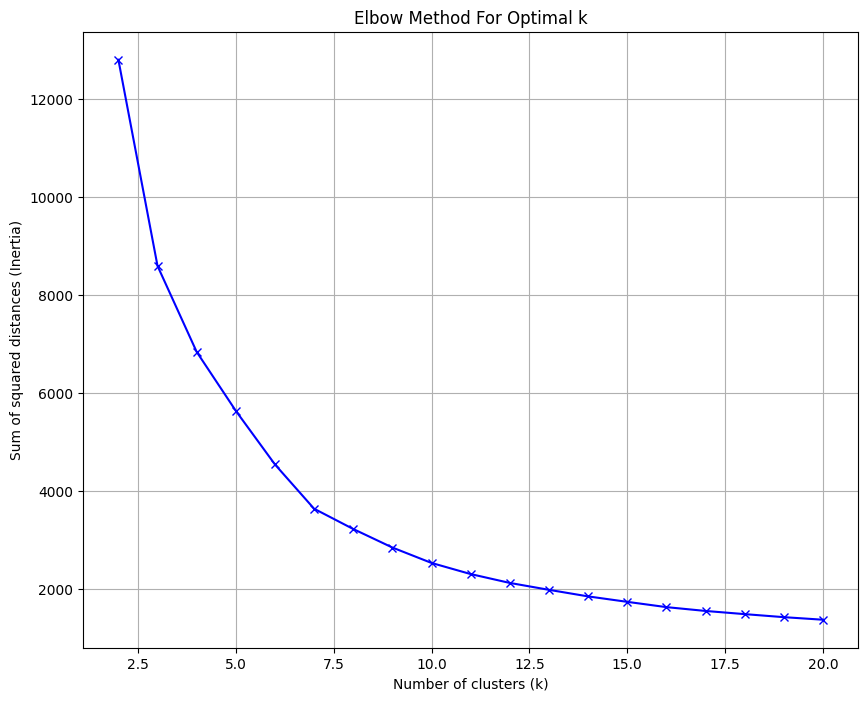

In [24]:
#Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


K = range(2, 21)
Sum_of_squared_distances = []

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_mds.drop(columns=['index'])) 
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [25]:
# K-Means Clustering
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 5
max_iterations = 100
NUM_ATTEMPTS = 500

def bcentroids(data, num_clusters, batch_size, max_iterations, NUM_ATTEMPTS):
    final_cents = []
    final_inert = []

    batch_size = min(batch_size, len(data))

    for sample in range(NUM_ATTEMPTS):
        random_indices = np.random.choice(len(data), size=batch_size, replace=False)
        data_sample = data[random_indices]
        
        km = KMeans(n_clusters=num_clusters, init='random', max_iter=1, n_init=1)
        km.fit(data_sample)
        inertia_start = km.inertia_
        inertia_end = 0
        cents = km.cluster_centers_

        for iter in range(max_iterations):
            km = KMeans(n_clusters=num_clusters, init=cents, max_iter=1, n_init=1)
            km.fit(data_sample)
            inertia_end = km.inertia_
            cents = km.cluster_centers_

        final_cents.append(cents)
        final_inert.append(inertia_end)

    best_cents = final_cents[np.argmin(final_inert)]
    return best_cents

best_cents = bcentroids(df_mds.drop(columns=['index']).values, num_clusters, 15000, max_iterations, NUM_ATTEMPTS)

km_full = KMeans(n_clusters=num_clusters, init=best_cents, max_iter=100, verbose=1, n_init=1)
km_full.fit(df_mds.drop(columns=['index'])) 

labels = km_full.predict(df_mds.drop(columns=['index']))  

cluster_counts = [0] * num_clusters
for label in labels:
    cluster_counts[label] += 1

total_points = len(df_mds)
cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

for i in range(num_clusters):
    print(f"Label {i+1}: {cluster_percentages[i]:.2f}%")

Initialization complete
Iteration 0, inertia 6140.722610052366.
Converged at iteration 0: center shift 2.5693831388070114e-30 within tolerance 0.0001837041610334863.
Label 1: 38.24%
Label 2: 33.98%
Label 3: 0.04%
Label 4: 22.86%
Label 5: 4.88%


In [26]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_mds.drop(columns=['index']), labels) 
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.3302


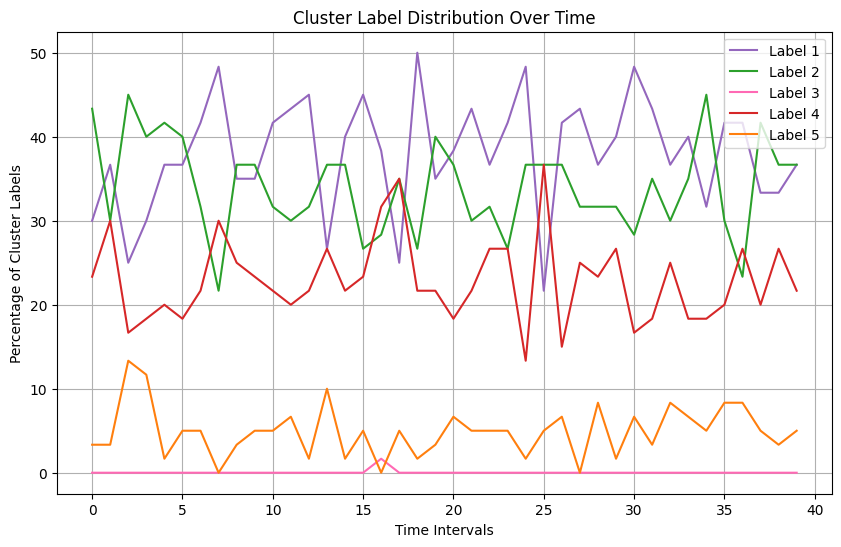

In [27]:
# Time series graph of clustering labels
import matplotlib.pyplot as plt
import numpy as np

time_interval_size = 60 
total_intervals = len(df_mds) // time_interval_size

time_series_labels = []

for i in range(total_intervals):
    start_idx = i * time_interval_size
    end_idx = start_idx + time_interval_size
    interval_labels = labels[start_idx:end_idx]
    
    label_counts = [0] * num_clusters
    for label in interval_labels:
        label_counts[label] += 1
    time_series_labels.append([count / time_interval_size * 100 for count in label_counts])

time_series_labels = np.array(time_series_labels)

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e'] 
plt.figure(figsize=(10, 6))

for cluster_id in range(num_clusters):
    plt.plot(range(total_intervals), time_series_labels[:, cluster_id], color=colors[cluster_id], label=f'Label {cluster_id + 1}')

plt.xlabel('Time Intervals')
plt.ylabel('Percentage of Cluster Labels')
plt.title('Cluster Label Distribution Over Time')
plt.legend()
plt.grid(True)
plt.show()

np.save('earthquake_time_series_labels.npy', time_series_labels)

P-wave starts at 0.0 seconds
S-wave starts at 5.0 seconds


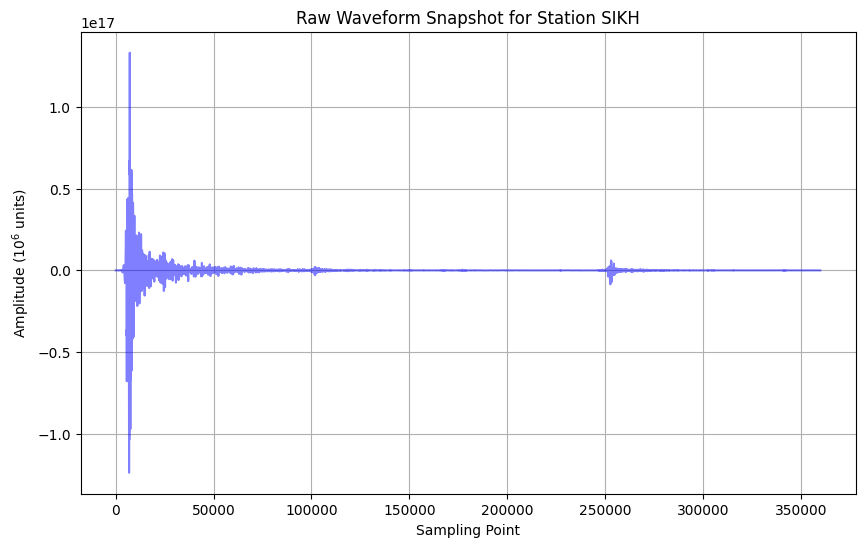

In [30]:
# Raw waveform _ All Samplings _ SIKH
import matplotlib.pyplot as plt
import numpy as np

station = 'SIKH'
waveform = selected_data[station][0].flatten() * 1e6  
index_mapping = df_sample['index'].values 
label_indices = labels  

fs = 100 

time = np.arange(len(waveform)) / fs  

p_wave_threshold = 0.05  

p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs)  
s_wave_threshold = 0.1 

s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

waveform *= 1e6  

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(waveform)), waveform, color='blue', alpha=0.5)  

plt.xlabel('Sampling Point')  
plt.ylabel('Amplitude ($10^6$ units)') 
plt.title(f'Raw Waveform Snapshot for Station {station}')
plt.grid(True)
plt.show()

P-wave starts at 0.0 seconds
S-wave starts at 5.0 seconds


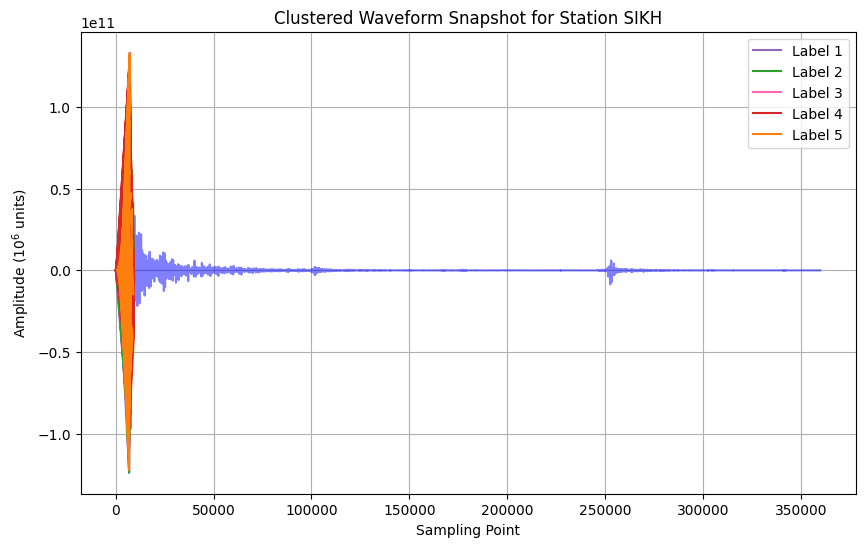

In [31]:
# Raw waveform _ All Labels Samplings _ SIKH
import matplotlib.pyplot as plt
import numpy as np

station = 'SIKH'
waveform = selected_data[station][0].flatten() * 1e6  
index_mapping = df_sample['index'].values
label_indices = labels 

fs = 100  

p_wave_threshold = 0.05 
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs)  
s_wave_threshold = 0.1  
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(waveform)), waveform, color='blue', alpha=0.5) 

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e'] 

for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)] 
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=1.0, label=f'Label {label + 1}')

plt.xlabel('Sampling Point')  
plt.ylabel('Amplitude ($10^6$ units)')  
plt.title(f'Clustered Waveform Snapshot for Station {station}')
plt.legend()
plt.grid(True)
plt.show()

P-wave starts at 0.0 seconds
S-wave starts at 5.0 seconds
P-wave label proportions:
Label 1: 12.33%
Label 2: 8.33%
Label 3: 0.00%
Label 4: 9.00%
Label 5: 0.00%

S-wave label proportions:
Label 1: 6.00%
Label 2: 8.67%
Label 3: 0.33%
Label 4: 13.33%
Label 5: 0.00%


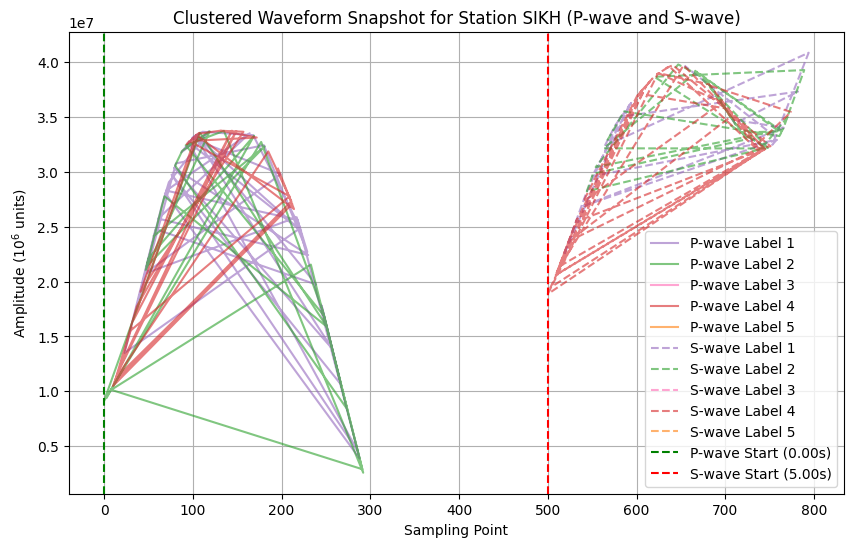

In [32]:
# Labels waveform _ P waves and S waves _ SIKH
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d 

station = 'SIKH' 
waveform = selected_data[station][0].flatten() * 1e6 
index_mapping = df_sample['index'].values 
label_indices = labels 

fs = 100
p_wave_threshold = 0.05 
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs) 
s_wave_threshold = 0.1 
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

p_wave_window_duration = 3  
s_wave_window_duration = 3 

p_wave_start_index = max(0, p_wave_start_index)
p_wave_end_index = min(len(waveform), p_wave_start_index + int(p_wave_window_duration * fs))

s_wave_start_index = max(0, s_wave_start_index)
s_wave_end_index = min(len(waveform), s_wave_start_index + int(s_wave_window_duration * fs))

waveform_smooth = gaussian_filter1d(waveform, sigma=2) 

p_waveform_window = waveform_smooth[p_wave_start_index:p_wave_end_index]
s_waveform_window = waveform_smooth[s_wave_start_index:s_wave_end_index]
p_time_window = np.arange(p_wave_start_index, p_wave_end_index)
s_time_window = np.arange(s_wave_start_index, s_wave_end_index)

def calculate_label_proportions(start_index, end_index, label_indices, index_mapping):
    total_points_in_window = end_index - start_index
    label_proportions = {}

    for label in np.unique(label_indices):
        label_mask = (label_indices == label)
        mapped_indices = index_mapping[label_mask]
        mapped_indices = mapped_indices[(mapped_indices >= start_index) & (mapped_indices < end_index)]
        mapped_indices = mapped_indices[mapped_indices < len(waveform)] 
        label_count = len(mapped_indices)
        label_proportions[label] = (label_count / total_points_in_window) * 100

    return label_proportions

p_wave_label_proportions = calculate_label_proportions(p_wave_start_index, p_wave_end_index, label_indices, index_mapping)
s_wave_label_proportions = calculate_label_proportions(s_wave_start_index, s_wave_end_index, label_indices, index_mapping)

print("P-wave label proportions:")
for label, proportion in p_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.2f}%")

print("\nS-wave label proportions:")
for label, proportion in s_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.2f}%")

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e'] 

plt.figure(figsize=(10, 6))

for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
   
    mapped_indices = mapped_indices[(mapped_indices >= p_wave_start_index) & (mapped_indices < p_wave_end_index)]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=0.6, label=f'P-wave Label {label + 1}')


for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
    
    mapped_indices = mapped_indices[(mapped_indices >= s_wave_start_index) & (mapped_indices < s_wave_end_index)]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=0.6, linestyle='--', label=f'S-wave Label {label + 1}')


plt.axvline(x=p_wave_start_index, color='green', linestyle='--', label=f'P-wave Start ({p_wave_start_time:.2f}s)')
plt.axvline(x=s_wave_start_index, color='red', linestyle='--', label=f'S-wave Start ({s_wave_start_time:.2f}s)')
plt.xlabel('Sampling Point') 
plt.ylabel('Amplitude ($10^6$ units)') 
plt.title(f'Clustered Waveform Snapshot for Station {station} (P-wave and S-wave)')
plt.legend()
plt.grid(True)
plt.show()

P-wave starts at 0.0 seconds
S-wave starts at 5.0 seconds


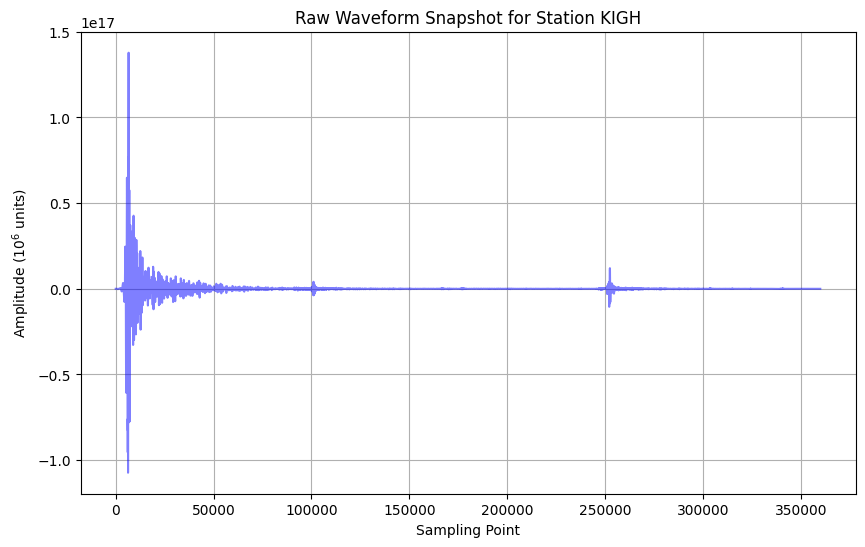

In [33]:
# Raw waveform _ All Samplings _ KIGH
import matplotlib.pyplot as plt
import numpy as np

station = 'KIGH'
waveform = selected_data[station][0].flatten() * 1e6  
index_mapping = df_sample['index'].values 
label_indices = labels  

fs = 100 

time = np.arange(len(waveform)) / fs  

p_wave_threshold = 0.05  

p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs)  
s_wave_threshold = 0.1 

s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

waveform *= 1e6  

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(waveform)), waveform, color='blue', alpha=0.5)  

plt.xlabel('Sampling Point')  
plt.ylabel('Amplitude ($10^6$ units)') 
plt.title(f'Raw Waveform Snapshot for Station {station}')
plt.grid(True)
plt.show()

P-wave starts at 0.0 seconds
S-wave starts at 5.0 seconds


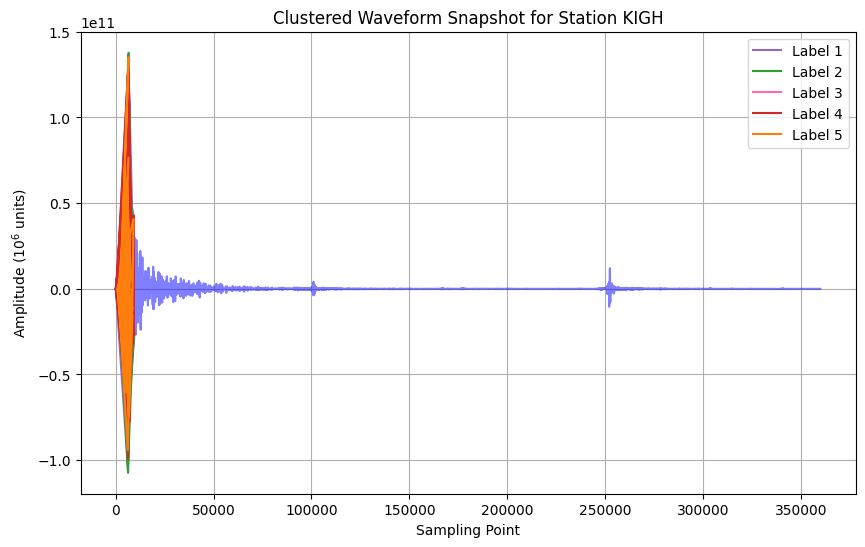

In [34]:
# Raw waveform _ All Labels Samplings _ KIGH
import matplotlib.pyplot as plt
import numpy as np

station = 'KIGH'
waveform = selected_data[station][0].flatten() * 1e6  
index_mapping = df_sample['index'].values
label_indices = labels 

fs = 100  

p_wave_threshold = 0.05 
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs)  
s_wave_threshold = 0.1  
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(waveform)), waveform, color='blue', alpha=0.5) 

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e'] 

for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)] 
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=1.0, label=f'Label {label + 1}')

plt.xlabel('Sampling Point')  
plt.ylabel('Amplitude ($10^6$ units)')  
plt.title(f'Clustered Waveform Snapshot for Station {station}')
plt.legend()
plt.grid(True)
plt.show()

P-wave starts at 0.0 seconds
S-wave starts at 5.0 seconds
P-wave label proportions:
Label 1: 12.33%
Label 2: 8.33%
Label 3: 0.00%
Label 4: 9.00%
Label 5: 0.00%

S-wave label proportions:
Label 1: 6.00%
Label 2: 8.67%
Label 3: 0.33%
Label 4: 13.33%
Label 5: 0.00%


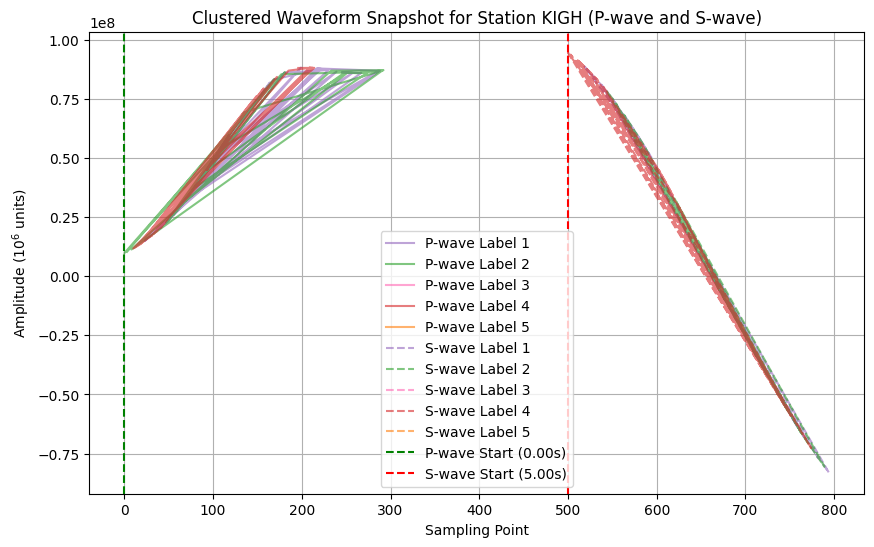

In [35]:
# Labels waveform _ P waves and S waves _ KIGH
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d 

station = 'KIGH' 
waveform = selected_data[station][0].flatten() * 1e6 
index_mapping = df_sample['index'].values 
label_indices = labels 

fs = 100
p_wave_threshold = 0.05 
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs) 
s_wave_threshold = 0.1 
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

p_wave_window_duration = 3  
s_wave_window_duration = 3 

p_wave_start_index = max(0, p_wave_start_index)
p_wave_end_index = min(len(waveform), p_wave_start_index + int(p_wave_window_duration * fs))

s_wave_start_index = max(0, s_wave_start_index)
s_wave_end_index = min(len(waveform), s_wave_start_index + int(s_wave_window_duration * fs))

waveform_smooth = gaussian_filter1d(waveform, sigma=2) 

p_waveform_window = waveform_smooth[p_wave_start_index:p_wave_end_index]
s_waveform_window = waveform_smooth[s_wave_start_index:s_wave_end_index]
p_time_window = np.arange(p_wave_start_index, p_wave_end_index)
s_time_window = np.arange(s_wave_start_index, s_wave_end_index)

def calculate_label_proportions(start_index, end_index, label_indices, index_mapping):
    total_points_in_window = end_index - start_index
    label_proportions = {}

    for label in np.unique(label_indices):
        label_mask = (label_indices == label)
        mapped_indices = index_mapping[label_mask]
        mapped_indices = mapped_indices[(mapped_indices >= start_index) & (mapped_indices < end_index)]
        mapped_indices = mapped_indices[mapped_indices < len(waveform)] 
        label_count = len(mapped_indices)
        label_proportions[label] = (label_count / total_points_in_window) * 100

    return label_proportions

p_wave_label_proportions = calculate_label_proportions(p_wave_start_index, p_wave_end_index, label_indices, index_mapping)
s_wave_label_proportions = calculate_label_proportions(s_wave_start_index, s_wave_end_index, label_indices, index_mapping)

print("P-wave label proportions:")
for label, proportion in p_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.2f}%")

print("\nS-wave label proportions:")
for label, proportion in s_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.2f}%")

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e'] 

plt.figure(figsize=(10, 6))

for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
   
    mapped_indices = mapped_indices[(mapped_indices >= p_wave_start_index) & (mapped_indices < p_wave_end_index)]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=0.6, label=f'P-wave Label {label + 1}')


for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
    
    mapped_indices = mapped_indices[(mapped_indices >= s_wave_start_index) & (mapped_indices < s_wave_end_index)]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=0.6, linestyle='--', label=f'S-wave Label {label + 1}')


plt.axvline(x=p_wave_start_index, color='green', linestyle='--', label=f'P-wave Start ({p_wave_start_time:.2f}s)')
plt.axvline(x=s_wave_start_index, color='red', linestyle='--', label=f'S-wave Start ({s_wave_start_time:.2f}s)')
plt.xlabel('Sampling Point') 
plt.ylabel('Amplitude ($10^6$ units)') 
plt.title(f'Clustered Waveform Snapshot for Station {station} (P-wave and S-wave)')
plt.legend()
plt.grid(True)
plt.show()

P-wave starts at 0.0 seconds
S-wave starts at 5.0 seconds
P-wave label proportions:
Label 1: 12.33%
Label 2: 8.33%
Label 3: 0.00%
Label 4: 9.00%
Label 5: 0.00%

S-wave label proportions:
Label 1: 6.00%
Label 2: 8.67%
Label 3: 0.33%
Label 4: 13.33%
Label 5: 0.00%


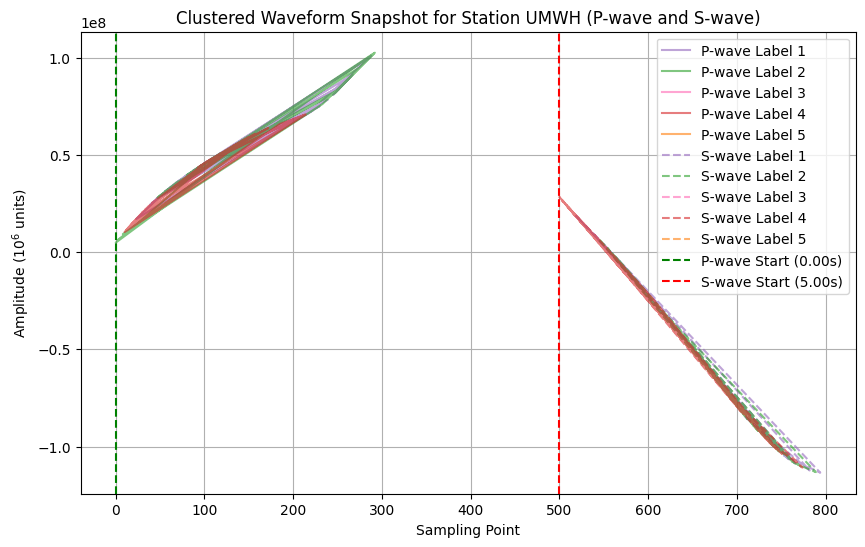

In [36]:
# Labels waveform _ P waves and S waves _ UMWH
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d 

station = 'UMWH' 
waveform = selected_data[station][0].flatten() * 1e6 
index_mapping = df_sample['index'].values 
label_indices = labels 

fs = 100
p_wave_threshold = 0.05 
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs) 
s_wave_threshold = 0.1 
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

p_wave_window_duration = 3  
s_wave_window_duration = 3 

p_wave_start_index = max(0, p_wave_start_index)
p_wave_end_index = min(len(waveform), p_wave_start_index + int(p_wave_window_duration * fs))

s_wave_start_index = max(0, s_wave_start_index)
s_wave_end_index = min(len(waveform), s_wave_start_index + int(s_wave_window_duration * fs))

waveform_smooth = gaussian_filter1d(waveform, sigma=2) 

p_waveform_window = waveform_smooth[p_wave_start_index:p_wave_end_index]
s_waveform_window = waveform_smooth[s_wave_start_index:s_wave_end_index]
p_time_window = np.arange(p_wave_start_index, p_wave_end_index)
s_time_window = np.arange(s_wave_start_index, s_wave_end_index)

def calculate_label_proportions(start_index, end_index, label_indices, index_mapping):
    total_points_in_window = end_index - start_index
    label_proportions = {}

    for label in np.unique(label_indices):
        label_mask = (label_indices == label)
        mapped_indices = index_mapping[label_mask]
        mapped_indices = mapped_indices[(mapped_indices >= start_index) & (mapped_indices < end_index)]
        mapped_indices = mapped_indices[mapped_indices < len(waveform)] 
        label_count = len(mapped_indices)
        label_proportions[label] = (label_count / total_points_in_window) * 100

    return label_proportions

p_wave_label_proportions = calculate_label_proportions(p_wave_start_index, p_wave_end_index, label_indices, index_mapping)
s_wave_label_proportions = calculate_label_proportions(s_wave_start_index, s_wave_end_index, label_indices, index_mapping)

print("P-wave label proportions:")
for label, proportion in p_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.2f}%")

print("\nS-wave label proportions:")
for label, proportion in s_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.2f}%")

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e'] 

plt.figure(figsize=(10, 6))

for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
   
    mapped_indices = mapped_indices[(mapped_indices >= p_wave_start_index) & (mapped_indices < p_wave_end_index)]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=0.6, label=f'P-wave Label {label + 1}')


for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
    
    mapped_indices = mapped_indices[(mapped_indices >= s_wave_start_index) & (mapped_indices < s_wave_end_index)]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=0.6, linestyle='--', label=f'S-wave Label {label + 1}')


plt.axvline(x=p_wave_start_index, color='green', linestyle='--', label=f'P-wave Start ({p_wave_start_time:.2f}s)')
plt.axvline(x=s_wave_start_index, color='red', linestyle='--', label=f'S-wave Start ({s_wave_start_time:.2f}s)')
plt.xlabel('Sampling Point') 
plt.ylabel('Amplitude ($10^6$ units)') 
plt.title(f'Clustered Waveform Snapshot for Station {station} (P-wave and S-wave)')
plt.legend()
plt.grid(True)
plt.show()

P-wave starts at 0.0 seconds
S-wave starts at 5.0 seconds
P-wave label proportions:
Label 1: 12.33%
Label 2: 8.33%
Label 3: 0.00%
Label 4: 9.00%
Label 5: 0.00%

S-wave label proportions:
Label 1: 6.00%
Label 2: 8.67%
Label 3: 0.33%
Label 4: 13.33%
Label 5: 0.00%


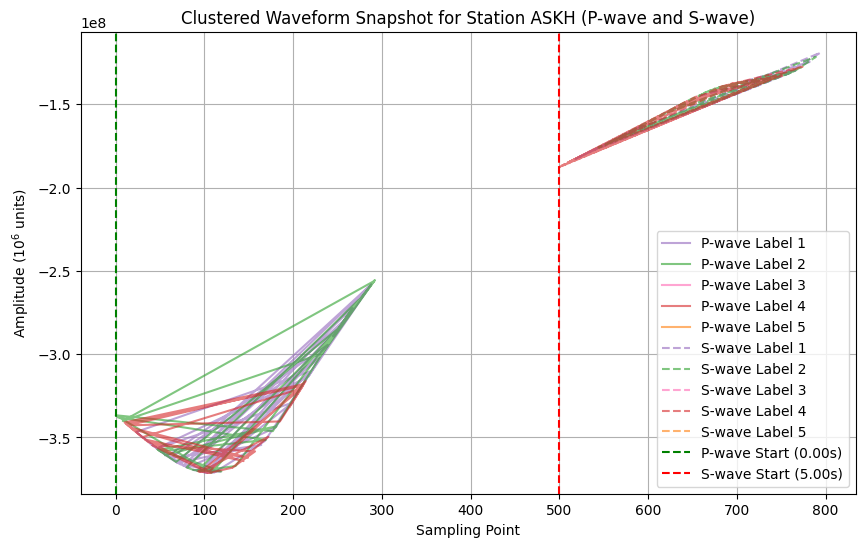

In [37]:
# Labels waveform _ P waves and S waves _ ASKH
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d 

station = 'ASKH' 
waveform = selected_data[station][0].flatten() * 1e6 
index_mapping = df_sample['index'].values 
label_indices = labels 

fs = 100
p_wave_threshold = 0.05 
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs) 
s_wave_threshold = 0.1 
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

p_wave_window_duration = 3  
s_wave_window_duration = 3 

p_wave_start_index = max(0, p_wave_start_index)
p_wave_end_index = min(len(waveform), p_wave_start_index + int(p_wave_window_duration * fs))

s_wave_start_index = max(0, s_wave_start_index)
s_wave_end_index = min(len(waveform), s_wave_start_index + int(s_wave_window_duration * fs))

waveform_smooth = gaussian_filter1d(waveform, sigma=2) 

p_waveform_window = waveform_smooth[p_wave_start_index:p_wave_end_index]
s_waveform_window = waveform_smooth[s_wave_start_index:s_wave_end_index]
p_time_window = np.arange(p_wave_start_index, p_wave_end_index)
s_time_window = np.arange(s_wave_start_index, s_wave_end_index)

def calculate_label_proportions(start_index, end_index, label_indices, index_mapping):
    total_points_in_window = end_index - start_index
    label_proportions = {}

    for label in np.unique(label_indices):
        label_mask = (label_indices == label)
        mapped_indices = index_mapping[label_mask]
        mapped_indices = mapped_indices[(mapped_indices >= start_index) & (mapped_indices < end_index)]
        mapped_indices = mapped_indices[mapped_indices < len(waveform)] 
        label_count = len(mapped_indices)
        label_proportions[label] = (label_count / total_points_in_window) * 100

    return label_proportions

p_wave_label_proportions = calculate_label_proportions(p_wave_start_index, p_wave_end_index, label_indices, index_mapping)
s_wave_label_proportions = calculate_label_proportions(s_wave_start_index, s_wave_end_index, label_indices, index_mapping)

print("P-wave label proportions:")
for label, proportion in p_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.2f}%")

print("\nS-wave label proportions:")
for label, proportion in s_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.2f}%")

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e'] 

plt.figure(figsize=(10, 6))

for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
   
    mapped_indices = mapped_indices[(mapped_indices >= p_wave_start_index) & (mapped_indices < p_wave_end_index)]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=0.6, label=f'P-wave Label {label + 1}')


for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
    
    mapped_indices = mapped_indices[(mapped_indices >= s_wave_start_index) & (mapped_indices < s_wave_end_index)]
    mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
    plt.plot(mapped_indices, waveform[mapped_indices], color=colors[label], alpha=0.6, linestyle='--', label=f'S-wave Label {label + 1}')


plt.axvline(x=p_wave_start_index, color='green', linestyle='--', label=f'P-wave Start ({p_wave_start_time:.2f}s)')
plt.axvline(x=s_wave_start_index, color='red', linestyle='--', label=f'S-wave Start ({s_wave_start_time:.2f}s)')
plt.xlabel('Sampling Point') 
plt.ylabel('Amplitude ($10^6$ units)') 
plt.title(f'Clustered Waveform Snapshot for Station {station} (P-wave and S-wave)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save centroid
earthquake_centroids = km_full.cluster_centers_
print("Earthquake Centroids (Shape: {}):".format(earthquake_centroids.shape))
print(earthquake_centroids)
np.save('earthquake_centroids.npy', earthquake_centroids)

In [ ]:
## Earthquake Group (749-750h) code
# Extract data from public sites and extract data from the 650th to 662th hour as non-earthquake groups
data = extract_data_from_common_stations(common_stations, file_paths, 650, 662)
print("Extracted data:", data)

In [ ]:
# Calculate the epicenter distance
distances = distance_epicenter(file_paths)
print("Distances from epicenter:", distances)

In [ ]:
# Function for selecting the site
def select_stations_by_distance(distances, num_near=3, num_mid=3, num_far=3):
    # Sort sites by distance
    sorted_stations = sorted(distances.items(), key=lambda item: item[1])
    
    # Select the near range stations
    near_stations = [station for station, _ in sorted_stations[:num_near]]
    
    # Select the medium range stations
    mid_stations = [station for station, _ in sorted_stations[num_near:num_near+num_mid]]
    
    # Select the far range stations
    far_stations = [station for station, _ in sorted_stations[-num_far:]]
    
    return near_stations, mid_stations, far_stations

# Use selection function
near_stations, mid_stations, far_stations = select_stations_by_distance(distances)
print("Near stations:", near_stations)
print("Mid-range stations:", mid_stations)
print("Far stations:", far_stations)

# Select stations and extract corresponding data
selected_stations = near_stations + mid_stations + far_stations

# Extract data and ignore non-existent stations
selected_data = {}

for file_path in data:
    for station in selected_stations:
        if station in data[file_path]:
            if station not in selected_data:
                selected_data[station] = []
            selected_data[station].append(data[file_path][station])

print("Selected data for processing:", selected_data)
print("Available stations in selected data:", list(selected_data.keys()))

In [ ]:
# Define high pass filtering function
def high_pass_filter(data, cutoff_freq=2, fs=100):
    b, a = butter(4, cutoff_freq / (0.5 * fs), btype='high')
    filtered_data = filtfilt(b, a, data, axis=1)
    return filtered_data

# Define signal truncation function
def data_cutoff(data, fs=100, window_size=5):
    num_samples = int(window_size * fs)
    num_windows = data.shape[1] // num_samples
    data_cut = [data[:, i * num_samples:(i + 1) * num_samples] for i in range(num_windows)]
    return np.array(data_cut)

# Process data for all stations
def process_data(selected_data):
    all_data = []

    for station in selected_data:
        for station_data in selected_data[station]:
            print(f"Processing station {station} with data shape {station_data.shape}")
            cut_data = data_cutoff(station_data)
            print(f"Data shape after slicing: {cut_data.shape}")
            filtered_station_data = np.array([high_pass_filter(chunk) for chunk in cut_data])
            all_data.append(filtered_station_data)
    
    all_data = np.vstack(all_data)
    
    return all_data

filtered_data = process_data(selected_data)
print("Combined data shape:", filtered_data.shape)

In [ ]:
# Fourier Transform
def myfourier(x):
    fs = 100
    n = x.shape[2]
    fi = np.linspace(0, fs / 2, int(n / 2))
    datafft = []

    for i in range(len(x)):
        fft_values = np.abs(np.fft.fft(x[i, 0, :])[:int(n / 2)])
        datafft.append(fft_values)

    return np.array(datafft)

datafft = myfourier(filtered_data)

print("FFT result shape:", datafft.shape)

In [ ]:
# 1.Calculate the characteristics of the integral square waveform
def iosw(x):
    integral = []
    for i in range(len(x)):
        data0 = x[i]
        data_squared = data0 ** 2
        integral.append(np.sum(data_squared))
    return integral

integral = iosw(datafft)

# 2.Calculate the maximum spectral amplitude and frequency
fs = 100  
n = datafft.shape[1] 
fi = np.linspace(0, fs / 2, n // 2)

def freq(x):
    max_indices = []
    max_amplitudes = []
    for array in x:
        max_index = np.argmax(array)
        max_indices.append(max_index)
        max_amplitudes.append(array[max_index].real)
    
    frequencies = []
    for index in max_indices:
        if index < len(fi):
            frequencies.append(fi[index])
        else:
            frequencies.append(np.nan) 
    
    return frequencies, max_amplitudes

frequencies, max_amplitudes = freq(datafft)

# 3.Calculate the center frequency
def cenfreq(x, y):
    center_frequency = []
    for i in range(len(x)):
        fi_resized = np.resize(fi, y[i].shape)
        numerator = np.sum(fi_resized * y[i]).real
        denominator = np.sum(y[i]).real
        center_frequency.append(numerator / denominator)
    return center_frequency

center_frequency = cenfreq(datafft, datafft)

# 4.Calculate the Signal Bandwidth
def signal_bandwidth(fi, y, z):
    signal_bandwidth = []
    for i in range(len(y)):
        fi_resized = np.resize(fi, y[i].shape)
        numerator = np.sum((fi_resized - z[i])**2)
        denominator = np.sum(z[i])
        bandwidth = np.sqrt(numerator / denominator).real
        signal_bandwidth.append(bandwidth)
    return signal_bandwidth

signal_bandwidth_values = signal_bandwidth(fi, datafft, center_frequency)

# 5.Calculate the Zero Upcrossing Rate
def zero_upcrossing_rate(fi, y):
    zero_upcrossing_rate = []
    for i in range(len(y)):
        fi_resized = np.resize(fi, y[i].shape)
        omega = 2 * np.pi * fi_resized
        numerator = np.sum(omega**2 * y[i]**2)
        denominator = np.sum(y[i])
        z_rate = np.sqrt(numerator / denominator).real
        zero_upcrossing_rate.append(z_rate)
    return zero_upcrossing_rate

zero_upcrossing_rate_values = zero_upcrossing_rate(fi, datafft)

# 6.Calculate the Rate of Spectral Peaks
def rate_of_spectral_peaks(fi, y):
    rate_of_spectral_peaks = []
    for i in range(len(y)):
        fi_resized = np.resize(fi, y[i].shape) 
        omega = 2 * np.pi * fi_resized
        numerator = np.sum(omega**4 * y[i]**2)
        denominator = np.sum(omega**2 * y[i]**2)
        peak_rate = np.sqrt(numerator / denominator).real
        rate_of_spectral_peaks.append(peak_rate)
    return rate_of_spectral_peaks

rate_of_spectral_peaks_values = rate_of_spectral_peaks(fi, datafft)

# Generate feature table
def creatdf():
    df = pd.DataFrame(list(zip(
        integral, 
        max_amplitudes, 
        frequencies, 
        center_frequency, 
        signal_bandwidth_values, 
        zero_upcrossing_rate_values, 
        rate_of_spectral_peaks_values
    )),
    columns=[
        'integral of the squared waveform', 
        'maximum spectral amplitude', 
        'frequency at the maximum spectral amplitude', 
        'center frequency', 
        'signal bandwidth', 
        'zero upcrossing rate', 
        'rate of spectral peaks'])
    
    return df

df = creatdf()
df

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

if df.isnull().values.any():
    print("The DataFrame contains missing values.")
else:
    print("The DataFrame does not contain any missing values.")

from sklearn.preprocessing import StandardScaler

# Handling missing values and standardization
df = df.dropna()
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
missing_values_after_scaling = df_std.isnull().sum()
print("Missing values in each column after standardization:")
print(missing_values_after_scaling)

if df_std.isnull().values.any():
    print("The DataFrame contains missing values after standardization.")
else:
    print("The DataFrame does not contain any missing values after standardization.")
    
print(f"The DataFrame contains {df_std.shape[0]} rows after standardization and removing rows with missing values.")

In [ ]:
# MDS
from sklearn.manifold import MDS

df_std['index'] = df_std.index

df_sample = df_std.sample(frac=0.02, random_state=42)

mds = MDS(n_components=4, random_state=42)
mds_transformed = mds.fit_transform(df_sample.drop(columns=['index']))

df_mds = pd.DataFrame(mds_transformed, columns=[f'Component {i+1}' for i in range(4)])
df_mds['index'] = df_sample['index'].values 

print(df_mds.head(10))

In [ ]:
# Elbow Method 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K = range(2, 21)

Sum_of_squared_distances = []

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_mds.drop(columns=['index']))
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal k _ Non Earthquake Group')
plt.grid(True)
plt.show()

In [ ]:
# K-Means Clustering
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 5
max_iterations = 100
NUM_ATTEMPTS = 500

def bcentroids(data, num_clusters, batch_size, max_iterations, NUM_ATTEMPTS):
    final_cents = []
    final_inert = []

    batch_size = min(batch_size, len(data))

    for sample in range(NUM_ATTEMPTS):
        random_indices = np.random.choice(len(data), size=batch_size, replace=False)
        data_sample = data[random_indices]
        
        km = KMeans(n_clusters=num_clusters, init='random', max_iter=1, n_init=1)
        km.fit(data_sample)
        inertia_start = km.inertia_
        inertia_end = 0
        cents = km.cluster_centers_

        for iter in range(max_iterations):
            km = KMeans(n_clusters=num_clusters, init=cents, max_iter=1, n_init=1)
            km.fit(data_sample)
            inertia_end = km.inertia_
            cents = km.cluster_centers_

        final_cents.append(cents)
        final_inert.append(inertia_end)

    best_cents = final_cents[np.argmin(final_inert)]
    return best_cents

best_cents = bcentroids(df_mds.drop(columns=['index']).values, num_clusters, 15000, max_iterations, NUM_ATTEMPTS)

km_full = KMeans(n_clusters=num_clusters, init=best_cents, max_iter=100, verbose=1, n_init=1)
km_full.fit(df_mds.drop(columns=['index'])) 

labels = km_full.predict(df_mds.drop(columns=['index']))  # 去除 'index' 列

cluster_counts = [0] * num_clusters
for label in labels:
    cluster_counts[label] += 1

total_points = len(df_mds)
cluster_percentages = [(count / total_points) * 100 for count in cluster_counts]

for i in range(num_clusters):
    print(f"Label {i+1}: {cluster_percentages[i]:.2f}%")

In [ ]:
# Time series graph of clustering labels
import matplotlib.pyplot as plt
import numpy as np

time_interval_size = 60  
total_intervals = len(df_mds) // time_interval_size

time_series_labels = []

for i in range(total_intervals):
    start_idx = i * time_interval_size
    end_idx = start_idx + time_interval_size
    interval_labels = labels[start_idx:end_idx]
    
    label_counts = [0] * num_clusters
    for label in interval_labels:
        label_counts[label] += 1
    time_series_labels.append([count / time_interval_size * 100 for count in label_counts]) 

time_series_labels = np.array(time_series_labels)

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e'] 
plt.figure(figsize=(10, 6))

for cluster_id in range(num_clusters):
    plt.plot(range(total_intervals), time_series_labels[:, cluster_id], color=colors[cluster_id], label=f'Label {cluster_id + 1}')

plt.xlabel('Time Intervals')
plt.ylabel('Percentage of Cluster Labels')
plt.title('Cluster Label Distribution Over Time _ Non Earthquake Group')
plt.legend()
plt.grid(True)
plt.show()

np.save('non_earthquake_time_series_labels.npy', time_series_labels)

In [ ]:
# Raw waveform _ All Samplings _ KIGH
import matplotlib.pyplot as plt
import numpy as np

station = 'SIKH'  
waveform = selected_data[station][0].flatten() * 1e6  
index_mapping = df_sample['index'].values  
label_indices = labels 

fs = 100  

sampling_rate = 10
waveform_downsampled = waveform[::sampling_rate]
downsampled_indices = np.arange(0, len(waveform), sampling_rate)

p_wave_threshold = 0.05
p_wave_start_index = np.argmax(np.abs(waveform_downsampled) > p_wave_threshold)
p_wave_start_time = (p_wave_start_index * sampling_rate) / fs  

s_wave_start_index = p_wave_start_index + int(5 * fs / sampling_rate) 
s_wave_threshold = 0.1  
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform_downsampled[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = (s_wave_start_index * sampling_rate) / fs 

print(f"P-wave starts at {p_wave_start_time:.2f} seconds (sampling point: {p_wave_start_index * sampling_rate})")
print(f"S-wave starts at {s_wave_start_time:.2f} seconds (sampling point: {s_wave_start_index * sampling_rate})")

plt.figure(figsize=(10, 6))
plt.plot(downsampled_indices, waveform_downsampled, color='blue', alpha=0.5)
plt.axvline(x=p_wave_start_index * sampling_rate, color='green', linestyle='--', label=f'P-wave Start ({p_wave_start_time:.2f}s)')
plt.axvline(x=s_wave_start_index * sampling_rate, color='red', linestyle='--', label=f'S-wave Start ({s_wave_start_time:.2f}s)')

plt.xlabel('Sampling Point') 
plt.ylabel('Amplitude ($10^6$ units)')
plt.title(f'Raw Waveform Snapshot for Station {station}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Labels waveform _ P waves and S waves _ SIKH
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

station = 'SIKH'  
waveform = selected_data[station][0].flatten() * 1e6  
index_mapping = df_sample['index'].values  
label_indices = labels  

fs = 100 


p_wave_threshold = 0.05  
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs) 
s_wave_threshold = 0.1  
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

window_duration = 3 
p_wave_start_index = max(0, p_wave_start_index)
p_wave_end_index = min(len(waveform), p_wave_start_index + int(window_duration * fs))

s_wave_start_index = max(0, s_wave_start_index)
s_wave_end_index = min(len(waveform), s_wave_start_index + int(window_duration * fs))

waveform_smooth = gaussian_filter1d(waveform, sigma=2) 

p_time_window = np.arange(p_wave_start_index, p_wave_end_index)
s_time_window = np.arange(s_wave_start_index, s_wave_end_index)

def calculate_label_proportions(time_window, start_index, end_index, label_indices, index_mapping):
    total_points_in_window = len(time_window)
    label_proportions = {}

    for label in np.unique(label_indices):
        label_mask = (label_indices == label)
        mapped_indices = index_mapping[label_mask]
        mapped_indices = mapped_indices[(mapped_indices >= start_index) & (mapped_indices < end_index)]
        mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
        label_count = len(mapped_indices)
        label_proportions[label] = label_count / total_points_in_window * 100

    return label_proportions

p_wave_label_proportions = calculate_label_proportions(p_time_window, p_wave_start_index, p_wave_end_index, label_indices, index_mapping)
s_wave_label_proportions = calculate_label_proportions(s_time_window, s_wave_start_index, s_wave_end_index, label_indices, index_mapping)

print("P-wave label proportions:")
for label, proportion in p_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.4f}%")

print("\nS-wave label proportions:")
for label, proportion in s_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.4f}%")

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e']  

plt.figure(figsize=(10, 6))
for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
   
    p_indices = mapped_indices[(mapped_indices >= p_wave_start_index) & (mapped_indices < p_wave_end_index)]
    p_indices = p_indices[p_indices < len(waveform)]
    plt.plot(p_indices, waveform[p_indices], color=colors[label], alpha=0.6, label=f'Label {label + 1} (P-wave)')
    
    s_indices = mapped_indices[(mapped_indices >= s_wave_start_index) & (mapped_indices < s_wave_end_index)]
    s_indices = s_indices[s_indices < len(waveform)]
    plt.plot(s_indices, waveform[s_indices], color=colors[label], linestyle='--', alpha=0.6, label=f'Label {label + 1} (S-wave)')

plt.axvline(x=p_wave_start_index, color='green', linestyle='--', label=f'P-wave Start ({p_wave_start_time:.2f}s)')
plt.axvline(x=s_wave_start_index, color='red', linestyle='--', label=f'S-wave Start ({s_wave_start_time:.2f}s)')

plt.xlabel('Sampling Point')
plt.ylabel('Amplitude ($10^6$ units)')
plt.title(f'Waveform Snapshot for Station {station} (P-wave and S-wave)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Labels waveform _ P waves and S waves _ KIGH
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

station = 'KIGH'  
waveform = selected_data[station][0].flatten() * 1e6  
index_mapping = df_sample['index'].values  
label_indices = labels  

fs = 100 


p_wave_threshold = 0.05  
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs) 
s_wave_threshold = 0.1  
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

window_duration = 3 
p_wave_start_index = max(0, p_wave_start_index)
p_wave_end_index = min(len(waveform), p_wave_start_index + int(window_duration * fs))

s_wave_start_index = max(0, s_wave_start_index)
s_wave_end_index = min(len(waveform), s_wave_start_index + int(window_duration * fs))

waveform_smooth = gaussian_filter1d(waveform, sigma=2) 

p_time_window = np.arange(p_wave_start_index, p_wave_end_index)
s_time_window = np.arange(s_wave_start_index, s_wave_end_index)

def calculate_label_proportions(time_window, start_index, end_index, label_indices, index_mapping):
    total_points_in_window = len(time_window)
    label_proportions = {}

    for label in np.unique(label_indices):
        label_mask = (label_indices == label)
        mapped_indices = index_mapping[label_mask]
        mapped_indices = mapped_indices[(mapped_indices >= start_index) & (mapped_indices < end_index)]
        mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
        label_count = len(mapped_indices)
        label_proportions[label] = label_count / total_points_in_window * 100

    return label_proportions

p_wave_label_proportions = calculate_label_proportions(p_time_window, p_wave_start_index, p_wave_end_index, label_indices, index_mapping)
s_wave_label_proportions = calculate_label_proportions(s_time_window, s_wave_start_index, s_wave_end_index, label_indices, index_mapping)

print("P-wave label proportions:")
for label, proportion in p_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.4f}%")

print("\nS-wave label proportions:")
for label, proportion in s_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.4f}%")

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e']  

plt.figure(figsize=(10, 6))
for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
   
    p_indices = mapped_indices[(mapped_indices >= p_wave_start_index) & (mapped_indices < p_wave_end_index)]
    p_indices = p_indices[p_indices < len(waveform)]
    plt.plot(p_indices, waveform[p_indices], color=colors[label], alpha=0.6, label=f'Label {label + 1} (P-wave)')
    
    s_indices = mapped_indices[(mapped_indices >= s_wave_start_index) & (mapped_indices < s_wave_end_index)]
    s_indices = s_indices[s_indices < len(waveform)]
    plt.plot(s_indices, waveform[s_indices], color=colors[label], linestyle='--', alpha=0.6, label=f'Label {label + 1} (S-wave)')

plt.axvline(x=p_wave_start_index, color='green', linestyle='--', label=f'P-wave Start ({p_wave_start_time:.2f}s)')
plt.axvline(x=s_wave_start_index, color='red', linestyle='--', label=f'S-wave Start ({s_wave_start_time:.2f}s)')

plt.xlabel('Sampling Point')
plt.ylabel('Amplitude ($10^6$ units)')
plt.title(f'Waveform Snapshot for Station {station} (P-wave and S-wave)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Labels waveform _ P waves and S waves _ UMWH
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

station = 'UMWH'  
waveform = selected_data[station][0].flatten() * 1e6  
index_mapping = df_sample['index'].values  
label_indices = labels  

fs = 100 


p_wave_threshold = 0.05  
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs) 
s_wave_threshold = 0.1  
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

window_duration = 3 
p_wave_start_index = max(0, p_wave_start_index)
p_wave_end_index = min(len(waveform), p_wave_start_index + int(window_duration * fs))

s_wave_start_index = max(0, s_wave_start_index)
s_wave_end_index = min(len(waveform), s_wave_start_index + int(window_duration * fs))

waveform_smooth = gaussian_filter1d(waveform, sigma=2) 

p_time_window = np.arange(p_wave_start_index, p_wave_end_index)
s_time_window = np.arange(s_wave_start_index, s_wave_end_index)

def calculate_label_proportions(time_window, start_index, end_index, label_indices, index_mapping):
    total_points_in_window = len(time_window)
    label_proportions = {}

    for label in np.unique(label_indices):
        label_mask = (label_indices == label)
        mapped_indices = index_mapping[label_mask]
        mapped_indices = mapped_indices[(mapped_indices >= start_index) & (mapped_indices < end_index)]
        mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
        label_count = len(mapped_indices)
        label_proportions[label] = label_count / total_points_in_window * 100

    return label_proportions

p_wave_label_proportions = calculate_label_proportions(p_time_window, p_wave_start_index, p_wave_end_index, label_indices, index_mapping)
s_wave_label_proportions = calculate_label_proportions(s_time_window, s_wave_start_index, s_wave_end_index, label_indices, index_mapping)

print("P-wave label proportions:")
for label, proportion in p_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.4f}%")

print("\nS-wave label proportions:")
for label, proportion in s_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.4f}%")

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e']  

plt.figure(figsize=(10, 6))
for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
   
    p_indices = mapped_indices[(mapped_indices >= p_wave_start_index) & (mapped_indices < p_wave_end_index)]
    p_indices = p_indices[p_indices < len(waveform)]
    plt.plot(p_indices, waveform[p_indices], color=colors[label], alpha=0.6, label=f'Label {label + 1} (P-wave)')
    
    s_indices = mapped_indices[(mapped_indices >= s_wave_start_index) & (mapped_indices < s_wave_end_index)]
    s_indices = s_indices[s_indices < len(waveform)]
    plt.plot(s_indices, waveform[s_indices], color=colors[label], linestyle='--', alpha=0.6, label=f'Label {label + 1} (S-wave)')

plt.axvline(x=p_wave_start_index, color='green', linestyle='--', label=f'P-wave Start ({p_wave_start_time:.2f}s)')
plt.axvline(x=s_wave_start_index, color='red', linestyle='--', label=f'S-wave Start ({s_wave_start_time:.2f}s)')

plt.xlabel('Sampling Point')
plt.ylabel('Amplitude ($10^6$ units)')
plt.title(f'Waveform Snapshot for Station {station} (P-wave and S-wave)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Labels waveform _ P waves and S waves _ ASKH
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

station = 'ASKH'  
waveform = selected_data[station][0].flatten() * 1e6  
index_mapping = df_sample['index'].values  
label_indices = labels  

fs = 100 


p_wave_threshold = 0.05  
p_wave_start_index = np.argmax(np.abs(waveform) > p_wave_threshold)
p_wave_start_time = p_wave_start_index / fs

s_wave_start_index = p_wave_start_index + int(5 * fs) 
s_wave_threshold = 0.1  
s_wave_start_index = s_wave_start_index + np.argmax(np.abs(waveform[s_wave_start_index:]) > s_wave_threshold)
s_wave_start_time = s_wave_start_index / fs

print(f"P-wave starts at {p_wave_start_time} seconds")
print(f"S-wave starts at {s_wave_start_time} seconds")

window_duration = 3 
p_wave_start_index = max(0, p_wave_start_index)
p_wave_end_index = min(len(waveform), p_wave_start_index + int(window_duration * fs))

s_wave_start_index = max(0, s_wave_start_index)
s_wave_end_index = min(len(waveform), s_wave_start_index + int(window_duration * fs))

waveform_smooth = gaussian_filter1d(waveform, sigma=2) 

p_time_window = np.arange(p_wave_start_index, p_wave_end_index)
s_time_window = np.arange(s_wave_start_index, s_wave_end_index)

def calculate_label_proportions(time_window, start_index, end_index, label_indices, index_mapping):
    total_points_in_window = len(time_window)
    label_proportions = {}

    for label in np.unique(label_indices):
        label_mask = (label_indices == label)
        mapped_indices = index_mapping[label_mask]
        mapped_indices = mapped_indices[(mapped_indices >= start_index) & (mapped_indices < end_index)]
        mapped_indices = mapped_indices[mapped_indices < len(waveform)]  
        label_count = len(mapped_indices)
        label_proportions[label] = label_count / total_points_in_window * 100

    return label_proportions

p_wave_label_proportions = calculate_label_proportions(p_time_window, p_wave_start_index, p_wave_end_index, label_indices, index_mapping)
s_wave_label_proportions = calculate_label_proportions(s_time_window, s_wave_start_index, s_wave_end_index, label_indices, index_mapping)

print("P-wave label proportions:")
for label, proportion in p_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.4f}%")

print("\nS-wave label proportions:")
for label, proportion in s_wave_label_proportions.items():
    print(f"Label {label + 1}: {proportion:.4f}%")

colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e']  

plt.figure(figsize=(10, 6))
for label in np.unique(label_indices):
    label_mask = (label_indices == label)
    mapped_indices = index_mapping[label_mask]
   
    p_indices = mapped_indices[(mapped_indices >= p_wave_start_index) & (mapped_indices < p_wave_end_index)]
    p_indices = p_indices[p_indices < len(waveform)]
    plt.plot(p_indices, waveform[p_indices], color=colors[label], alpha=0.6, label=f'Label {label + 1} (P-wave)')
    
    s_indices = mapped_indices[(mapped_indices >= s_wave_start_index) & (mapped_indices < s_wave_end_index)]
    s_indices = s_indices[s_indices < len(waveform)]
    plt.plot(s_indices, waveform[s_indices], color=colors[label], linestyle='--', alpha=0.6, label=f'Label {label + 1} (S-wave)')

plt.axvline(x=p_wave_start_index, color='green', linestyle='--', label=f'P-wave Start ({p_wave_start_time:.2f}s)')
plt.axvline(x=s_wave_start_index, color='red', linestyle='--', label=f'S-wave Start ({s_wave_start_time:.2f}s)')

plt.xlabel('Sampling Point')
plt.ylabel('Amplitude ($10^6$ units)')
plt.title(f'Waveform Snapshot for Station {station} (P-wave and S-wave)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save centroid
non_earthquake_centroids = km_full.cluster_centers_
print("Non Earthquake Centroids (Shape: {}):".format(non_earthquake_centroids.shape))
print(non_earthquake_centroids)
np.save('non_earthquake_centroids.npy', non_earthquake_centroids)  

In [ ]:
# Calculate the distance between the centroid and the
import numpy as np
from scipy.spatial.distance import cdist

earthquake_centroids = np.load('earthquake_centroids.npy')
non_earthquake_centroids = np.load('non_earthquake_centroids.npy')
print(f"Earthquake Centroids (Shape: {earthquake_centroids.shape}):\n", earthquake_centroids)
print(f"Non Earthquake Centroids (Shape: {non_earthquake_centroids.shape}):\n", non_earthquake_centroids)

distance_matrix = cdist(earthquake_centroids, non_earthquake_centroids, metric='euclidean')
print("Distance Matrix between Earthquake and Non-Earthquake Centroids:\n", distance_matrix)

min_distance = np.min(distance_matrix)
max_distance = np.max(distance_matrix)
mean_distance = np.mean(distance_matrix)

print(f"Minimum distance between centroids: {min_distance}")
print(f"Maximum distance between centroids: {max_distance}")
print(f"Mean distance between centroids: {mean_distance}")

In [ ]:
# Label time series comparison
import matplotlib.pyplot as plt
import numpy as np

earthquake_time_series_labels = np.load('earthquake_time_series_labels.npy')
non_earthquake_time_series_labels = np.load('non_earthquake_time_series_labels.npy')

total_intervals_earthquake = earthquake_time_series_labels.shape[0]
total_intervals_non_earthquake = non_earthquake_time_series_labels.shape[0]
num_clusters = earthquake_time_series_labels.shape[1]
colors = ['#9467bd', '#2ca02c', '#ff69b4', '#d62728', '#ff7f0e'] 

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
for cluster_id in range(num_clusters):
    plt.plot(range(total_intervals_earthquake), earthquake_time_series_labels[:, cluster_id], 
             color=colors[cluster_id], label=f'Label {cluster_id + 1}')
plt.xlabel('Time Intervals (Earthquake Group)')
plt.ylabel('Percentage of Cluster Labels')
plt.title('Cluster Label Distribution Over Time - Earthquake Group')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
for cluster_id in range(num_clusters):
    plt.plot(range(total_intervals_non_earthquake), non_earthquake_time_series_labels[:, cluster_id], 
             color=colors[cluster_id], label=f'Label {cluster_id + 1}')
plt.xlabel('Time Intervals (Non-Earthquake Group)')
plt.ylabel('Percentage of Cluster Labels')
plt.title('Cluster Label Distribution Over Time - Non-Earthquake Group')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Z-score
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Mean of the earthquake period (X)': [11.48, 13.25, 33.61, 8.87, 32.78],
    'Mean of the 12-hour period (μ)': [8.83, 14.42, 35.05, 18.94, 22.76],
    'Standard deviation of the 12-hour period (σ)': [0.11, 0.13, 0.13, 0.14, 0.14],
    'Z-score': [0.25, -0.09, -0.11, -0.71, 0.72]
}

df = pd.DataFrame(data, index=[f'Label {i+1}' for i in range(5)])

styled_df = df.style.set_properties(**{
    'font-size': '10pt',  
    'text-align': 'center'  
}).set_table_styles([{
    'selector': 'th',
    'props': [('font-size', '10pt'), ('text-align', 'center')]  
}])

styled_df